In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist #to import our dataset
from tensorflow.keras.models import Sequential # imports our type of network
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.optimizers import RMSprop

from tensorflow.python.keras.losses import categorical_crossentropy #loss function
from tensorflow.python.keras.optimizers import Adam, SGD #optimisers
from tensorflow.python.keras.utils import to_categorical #some function for data preparation
from tensorflow.keras.datasets import cifar10


%matplotlib inline

## CNNs vs Fully Connected Networks

In [3]:
batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [0]:
## Putting images at random places
a = np.random.choice(range(1,23))
b = 22 - a #need to add 22 units of padding
c =  np.random.choice(range(1,23))
d = 22 - c
x_train = np.pad(x_train, [[0,0], [a,b], [c,d]], 'constant')
x_test = np.pad(x_test, [[0,0], [a,b], [c,d]], 'constant')

In [5]:
x_train.shape

(60000, 50, 50)

In [6]:
#Neural network with single dense hidden layer

model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer=SGD(), metrics=['accuracy'], verbose = 1)

#model.compile(loss=categorical_crossentropy,optimizer=Adadelta())

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
history1=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 3s 56us/sample - loss: 1.1559 - acc: 0.7560 - val_loss: 0.6281 - val_acc: 0.8642
Epoch 2/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.5406 - acc: 0.8697 - val_loss: 0.4485 - val_acc: 0.8878
Epoch 3/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.4329 - acc: 0.8872 - val_loss: 0.3867 - val_acc: 0.8963
Epoch 4/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3858 - acc: 0.8957 - val_loss: 0.3523 - val_acc: 0.9053
Epoch 5/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3578 - acc: 0.9014 - val_loss: 0.3312 - val_acc: 0.9099
Epoch 6/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3381 - acc: 0.9059 - val_loss: 0.3155 - val_acc: 0.9136
Epoch 7/20
60000/60000 [==============================] - 3s 48us/sa

10000/10000 [==============================] - 1s 71us/sample - loss: 0.2235 - acc: 0.9381

Test loss: 0.22348147659003734
Test accuracy: 0.9381


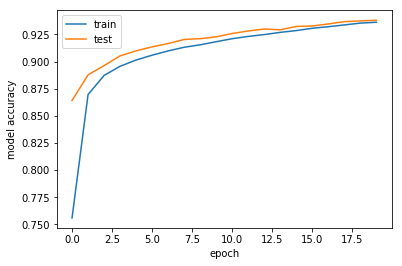

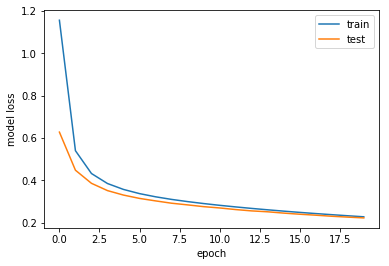

In [8]:
# evaluate model
score = model.evaluate(x_test, y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [0]:
# Preparing data for CNN:
#Reshape the data into 2D data (or 3D with 1 color channel)

x_train = x_train.reshape((x_train.shape[0], 50, 50, 1))

x_test = x_test.reshape((x_test.shape[0], 50, 50, 1))

In [10]:
#LeNet-5

cnn = Sequential()

cnn.add(Conv2D(32, kernel_size=5, padding='same', activation='relu', input_shape=(50, 50, 1)))
cnn.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
cnn.add(Activation('relu'))
        
cnn.add(Conv2D(64, kernel_size=5, activation='relu', padding='valid'))
cnn.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
cnn.add(Activation('relu'))

cnn.add(Flatten())

cnn.add(Dense(units=120, activation='relu'))
cnn.add(Dense(units=84, activation='relu'))
cnn.add(Dense(units=10, activation = 'softmax'))
        
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
__________

In [11]:
## Compiling the model. Using different loss functions and optimizers.
sgd  = tf.keras.optimizers.SGD()
cnn.compile(loss='mean_squared_error', optimizer=sgd , metrics=['accuracy'])

Instructions for updating:
Use tf.cast instead.


In [12]:
cnn.fit(x_train, y_train, epochs=30 ,batch_size=128 , verbose=1)

Epoch 1/30
60000/60000 [==============================] - 10s 171us/sample - loss: 0.0899 - acc: 0.1279
Epoch 2/30
60000/60000 [==============================] - 9s 149us/sample - loss: 0.0897 - acc: 0.1574
Epoch 3/30
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0895 - acc: 0.2077
Epoch 4/30
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0892 - acc: 0.2663
Epoch 5/30
60000/60000 [==============================] - 9s 150us/sample - loss: 0.0890 - acc: 0.3041
Epoch 6/30
60000/60000 [==============================] - 9s 149us/sample - loss: 0.0887 - acc: 0.3315
Epoch 7/30
60000/60000 [==============================] - 9s 149us/sample - loss: 0.0883 - acc: 0.3774
Epoch 8/30
60000/60000 [==============================] - 9s 149us/sample - loss: 0.0878 - acc: 0.4293
Epoch 9/30
60000/60000 [==============================] - 9s 149us/sample - loss: 0.0872 - acc: 0.4717
Epoch 10/30
60000/60000 [==============================] - 9s 150us/samp

## Visualizing output of Hidden layers of a CNN (already trained)

In [13]:
model3 = tf.keras.models.load_model('keras_cifar10_trained_model.h5')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_13 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)        18496     
__________

In [0]:
# Preparing the data for input

num_classes = 10
(xc_train, yc_train), (xc_test, yc_test) = cifar10.load_data()

# Convert class vectors to binary class matrices.
yc_train = tf.keras.utils.to_categorical(yc_train, num_classes)
yc_test = tf.keras.utils.to_categorical(yc_test, num_classes)

In [16]:
predc = model3.predict(xc_test)
mismatch = [] ## this list will store indices of all wrong predictions
for i in range(len(xc_test)):
  if np.array_equal(predc[i].astype(int), yc_test[i]):
    continue
  else:
    mismatch.append(i)
  
print(len(mismatch))

6028


#### As we can see there are around 60% (6028 mismatches out of 10000) mismatches so the model we imported is not performing really well

In [0]:
layer_weights = model3.layers[0].get_weights()[0]
layer3_weights = model3.layers[2].get_weights()[0]
layer4_weights = model3.layers[6].get_weights()[0]


In [0]:
#Printing the activation from all the layers

layer_outputs = [layer.output for layer in model3.layers] # Extracts the outputs of the layers
activation_model = tf.keras.models.Model(inputs=model3.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

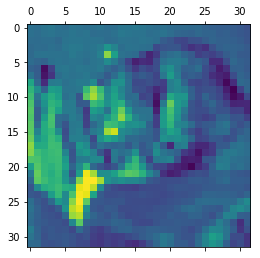

In [18]:
activations = activation_model.predict(xc_test[0:1])
plt.matshow(xc_test[0,:,:,1], cmap='viridis')

In [19]:
# Output/Activation of the first layer
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 32, 32, 32)


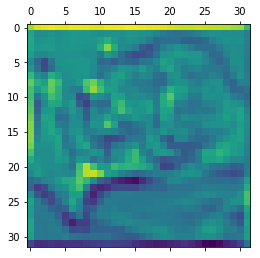

In [20]:
## Printing the output from the first layer only
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')